## データ分析のサンプルNotebook

### データの表示

In [1]:
import pandas as pd
customer = pd.read_csv('customer.csv')
customer.head()

,顧客ID,顧客名,性別,年齢
0,1,田中,男,21
1,2,斎藤,女,32
2,3,山田,女,56
3,4,佐藤,男,43
4,5,北野,男,23


In [2]:
item = pd.read_csv('item.csv')
item.head()

,商品ID,商品名,金額
0,1,りんご,100
1,2,みかん,100
2,3,チョコレート,200
3,4,牛乳,250
4,5,チーズ,300


In [3]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,1,2020/01/01,1,100,2,1
1,2,2020/01/01,1,200,2,2
2,3,2020/01/03,5,100,6,1
3,4,2020/01/04,5,500,4,2
4,5,2020/01/10,7,100,1,1


In [4]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_2.head()

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,9,2020/02/01,6,200,3,1
1,10,2020/02/03,1,100,2,1
2,11,2020/02/08,4,100,1,1
3,12,2020/02/10,1,100,2,1
4,13,2020/02/12,1,300,6,3


### データの結合（ユニオン）

In [5]:
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,1,2020/01/01,1,100,2,1
1,2,2020/01/01,1,200,2,2
2,3,2020/01/03,5,100,6,1
3,4,2020/01/04,5,500,4,2
4,5,2020/01/10,7,100,1,1
5,6,2020/01/11,2,250,4,1
6,7,2020/01/13,3,300,5,1
7,8,2020/01/18,2,500,5,2
8,9,2020/02/01,6,200,3,1
9,10,2020/02/03,1,100,2,1


In [16]:
transaction = pd.concat([transaction_1, transaction_2])
transaction.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6], dtype='int64')

### データの結合（ジョイン）

In [6]:
sales_data = pd.merge(transaction, customer, on='顧客ID')
sales_data

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数,顧客名,性別,年齢
0,1,2020/01/01,1,100,2,1,田中,男,21
1,2,2020/01/01,1,200,2,2,田中,男,21
2,10,2020/02/03,1,100,2,1,田中,男,21
3,12,2020/02/10,1,100,2,1,田中,男,21
4,13,2020/02/12,1,300,6,3,田中,男,21
5,3,2020/01/03,5,100,6,1,北野,男,23
6,4,2020/01/04,5,500,4,2,北野,男,23
7,5,2020/01/10,7,100,1,1,岡田,女,44
8,14,2020/02/18,7,100,6,1,岡田,女,44
9,15,2020/02/18,7,200,3,1,岡田,女,44


## groupby()で、顧客IDごとに購買金額と購入数を表示

In [7]:
sales_per_customer = transaction.groupby('顧客ID')['購買金額', '購入数'].sum()
sales_per_customer

,購買金額,購入数
顧客ID,,
1,800,8
2,750,3
3,300,1
4,100,1
5,600,3
6,200,1
7,400,3


## groupby()で、購買日ごとの売上数を表示

In [8]:
daily_sales = sales_data.groupby('購買日').購入数.mean()
daily_sales

購買日
2020/01/01    1.5
2020/01/03    1.0
2020/01/04    2.0
2020/01/10    1.0
2020/01/11    1.0
2020/01/13    1.0
2020/01/18    2.0
2020/02/01    1.0
2020/02/03    1.0
2020/02/08    1.0
2020/02/10    1.0
2020/02/12    3.0
2020/02/18    1.0
Name: 購入数, dtype: float64

## 顧客ごとの売上を棒グラフで表示

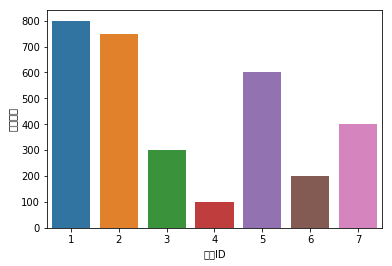

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x=sales_per_customer.index, y="購買金額", data=sales_per_customer)

## 購買日ごとの売上金額合計を折れ線グラフで表示

## 購買日ごとの売上金額を積み上げ、棒グラフで表示